In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential

In [ ]:
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import imageio
import matplotlib.image as img


In [ ]:
import os 
import pathlib 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [ ]:
path = pathlib.Path(r"C:\Users\91921\OneDrive\Desktop\polyp_dataset")

In [ ]:
dyed_ifted_polyps = list(path.glob('dyed-lifted-polyps/*'))
dyed_resection_margins = list(path.glob('dyed-resection-margins/*'))
esophagitis = list(path.glob('esophagitis/*'))
normal_cecum = list(path.glob('normal-cecum/*'))
normal_pylorus = list(path.glob('normal-pylorus/*'))
normal_z_line = list(path.glob('normal-z-line/*'))
polyps = list(path.glob('polyps/*'))
ulcerative_colitis = list(path.glob('ulcerative-colitis/*'))

In [ ]:
data = {
    'dyed-lifted-polyps' : dyed_ifted_polyps ,
    'dyed-resection-margins' : dyed_resection_margins,
    'esophagitis' : esophagitis,
    'normal-cecum' : normal_cecum,
    'normal-pylorus' : normal_pylorus,
    'normal-z-line' : normal_z_line,
    'polyps' : polyps,
    'ulcerative-colitis' : ulcerative_colitis
}

polys_labels = {
    0:'dyed-lifted-polyps',
    1:'dyed-resection-margins',
    2:'esophagitis',
    3:'normal-cecum',
    4:'normal-pylorus',
    5:'normal-z-line',
    6:'polyps',
    7:'ulcerative-colitis'
}

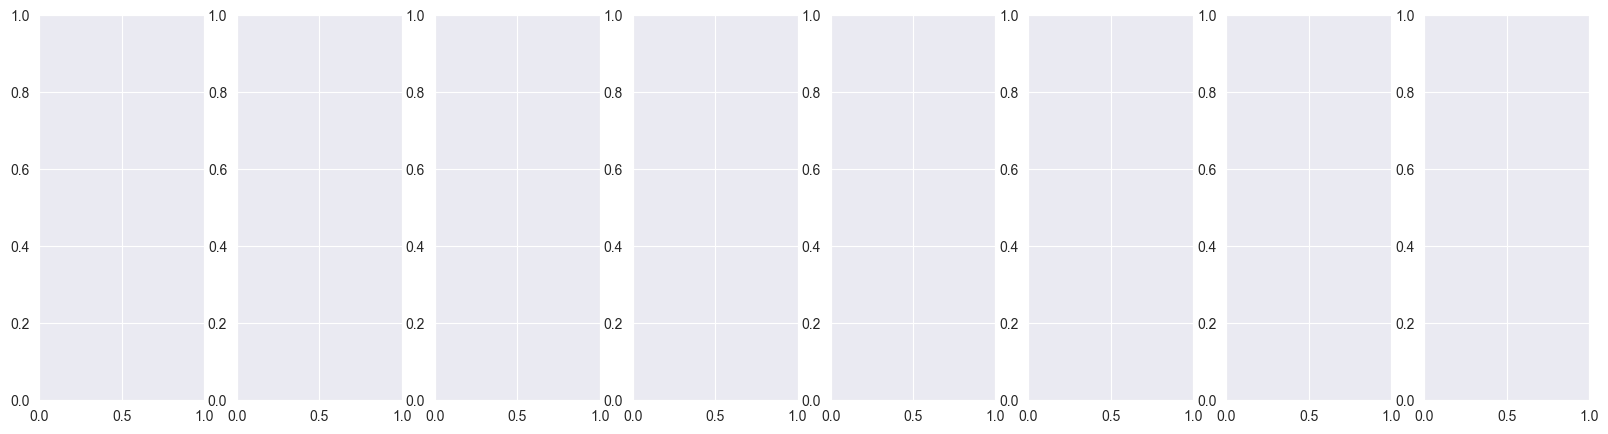

In [ ]:
fig , ax = plt.subplots(ncols=8 , figsize=(20,5))

In [ ]:
fig.suptitle ('Polyps Types', color='magenta', fontsize = 20)

Text(0.5, 0.98, 'Polyps Types')

In [ ]:
print(dyed_ifted_polyps)  # This should print a list of file paths

[WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/007d5aa7-7289-4bad-aa4a-5c3a259e9b19.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/008aa3ed-1812-4854-954c-120ae85bb6bd.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/009171b0-52ed-4410-a1e3-410c6e746402.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/00cf9508-6ad1-4db9-840a-519c1d515c30.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/01507fbd-4d38-4525-9768-7754710f507c.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/018ed8ed-e489-4bbb-8a99-3346db9ec160.jpg'), WindowsPath('C:/Users/91921/OneDrive/Desktop/polyp_dataset/dyed-lifted-polyps/0195c5a6-5ddf-471c-9868-2ea66b81f440.jpg'), WindowsPath('C:/Users/9

In [ ]:
dyed_ifted_polyps_img = img.imread(dyed_ifted_polyps[0])

In [ ]:
dyed_resection_margins_img = img.imread(dyed_resection_margins[0])

In [ ]:
esophagitis_img = img.imread(esophagitis[0])

normal_cecum_img = img.imread(normal_cecum[0])

normal_pylorus_img = img.imread(normal_pylorus[0])

normal_z_line_img = img.imread(normal_z_line[0])

polyps_img = img.imread(polyps[0])

ulcerative_colitis_img = img.imread(ulcerative_colitis[0])

ulcerative_colitis_img = img.imread(ulcerative_colitis[0])
for index,name in enumerate(list(data.keys())):
    
    ax[index].set_title(name)
    
ax[0].imshow(dyed_ifted_polyps_img)

ax[1].imshow(dyed_resection_margins_img)

ax[2].imshow(esophagitis_img)

ax[3].imshow(normal_cecum_img)

ax[4].imshow(normal_pylorus_img)

ax[5].imshow(normal_z_line_img)

ax[6].imshow(polyps_img)

ax[7].imshow(ulcerative_colitis_img)

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory(r"C:\Users\91921\OneDrive\Desktop\polyp_dataset",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data =train_gen.flow_from_directory(r"C:\Users\91921\OneDrive\Desktop\polyp_dataset",target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(units=8,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,159,208 (23.50 MB)

 Trainable params: 6,159,208 (23.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history=model.fit(train_data,epochs=2,validation_data=test_data,shuffle=True)

Epoch 1/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.6848 - loss: 0.6613 - val_accuracy: 0.6600 - val_loss: 0.7426
Epoch 2/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7575 - loss: 0.5130 - val_accuracy: 0.7169 - val_loss: 0.6858


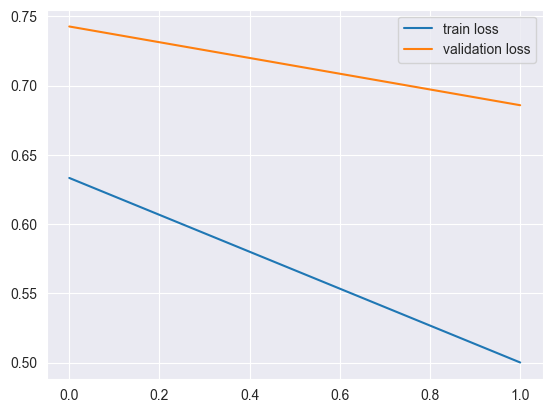

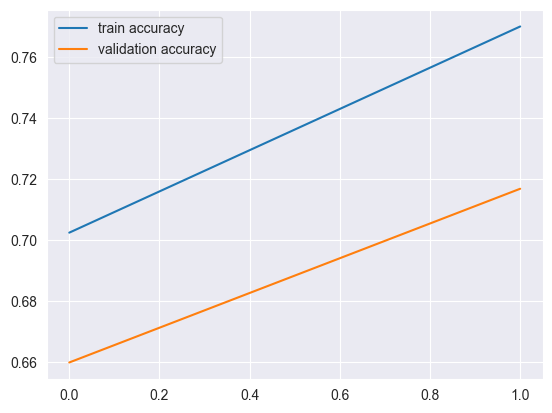

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to predict if the image contains a polyp (Yes/No)
def predict_polyp(image_path, model, target_size=(224, 224)):  # Adjust target_size based on your model's input size
    # Load and preprocess the image
    image = load_img(image_path, target_size=target_size)  # Load image
    image = img_to_array(image)  # Convert image to array
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Scale pixel values between 0 and 1 if this was used during training

    # Make a prediction
    prediction = model.predict(image)  # Assuming model outputs probabilities

    # Interpret the result
    if prediction[0][0] > 0.5:
        return "Yes"  # Polyp detected
    else:
        return "No"  # Polyp not detected

# Example usage:
# Replace 'model' with your trained model and 'path_to_image' with the image file path
result = predict_polyp(r"C:\Users\91921\Downloads\Screenshot 2024-11-11 002302.jpg", model)
print("Polyp present:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Polyp present: No
